In [6]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv("Iris.csv")

In [8]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
print("Name of Columns in the dataset : ",df.columns)

Name of Columns in the dataset :  Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [10]:
print("No. of rows , No. of columns",df.shape)

No. of rows , No. of columns (150, 6)


In [11]:
print("Datatypes of the column",df.dtypes)

Datatypes of the column Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [12]:
print("no. of rows in Dataset is :",df.shape[0])

no. of rows in Dataset is : 150


In [13]:
print("no. of rows in Dataset is :",df.shape[1])

no. of rows in Dataset is : 6


In [14]:
print("name of numeric datatype columns",df.select_dtypes(include = np.number).columns.tolist())

name of numeric datatype columns ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [15]:
print("name of non-numeric datatype columns",df.select_dtypes(include = ["object"]).columns.tolist())

name of non-numeric datatype columns ['Species']


In [16]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


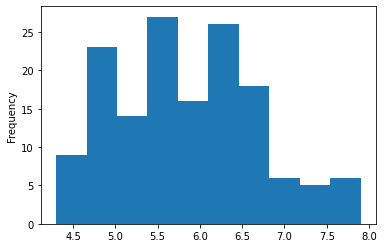

In [17]:
df['SepalLengthCm'].plot.hist()

In [18]:
df1=df.drop(['Id'], axis=1)

In [19]:
df1.shape

(150, 5)

In [20]:
df1.isna()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [21]:
x=df1.iloc[:,:4]

In [22]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
y=df1.iloc[:,4]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

**1.PCA technique**

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
fpca=pca.fit_transform(x)

In [25]:
type(fpca)

numpy.ndarray

In [26]:
x_t=pd.DataFrame(fpca, columns=['Col1','col2'])

In [27]:
x_t.sample(5)

,Col1,col2
80,-0.070343,-0.702538
102,2.616485,0.341935
107,2.932005,0.352377
67,0.234541,-0.331922
73,0.920503,-0.182390


**2.Reduce dimensions using SelectKBest method**

In [28]:
from sklearn.feature_selection import SelectKBest, chi2

In [29]:
x.shape

(150, 4)

In [30]:
x_new = SelectKBest(chi2, k=2).fit_transform(x, y)
x_new.shape

(150, 2)

**3.Reduce dimensions using SelectPercentile method**

In [31]:
from sklearn.feature_selection import SelectPercentile, chi2
x.shape

(150, 4)

In [33]:
X_new = SelectPercentile(chi2, percentile=10).fit_transform(x, y)
X_new.shape

(150, 1)